## Загрузка набора данных

In [1]:
import pandas

test_data = pandas.read_csv('data/test.csv')
training_data = pandas.read_csv('data/training.csv')
validation_data = pandas.read_csv('data/validation.csv')

print(test_data.info())
print(training_data.info())
print(validation_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None


## Подготовка набора данных

In [2]:
import nltk
import re

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def prepare_text(text):
    text = text.lower()

    # Удаление небуквенных символов и приведение к нижнему регистру
    text = ''.join(character for character in text if character.isalpha() or character.isspace())

    # Лемматизация
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    return text

test_data['text'] = test_data['text'].apply(prepare_text)
training_data['text'] = training_data['text'].apply(prepare_text)
validation_data['text'] = validation_data['text'].apply(prepare_text)

print(test_data)
print(training_data)
print(validation_data)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fbidn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                   text  label
0     im feeling rather rotten so im not very ambiti...      0
1             im updating my blog because i feel shitty      0
2     i never make her separate from me because i do...      0
3     i left with my bouquet of red and yellow tulip...      1
4        i wa feeling a little vain when i did this one      0
...                                                 ...    ...
1995  i just keep feeling like someone is being unki...      3
1996  im feeling a little cranky negative after this...      3
1997  i feel that i am useful to my people and that ...      1
1998  im feeling more comfortable with derby i feel ...      1
1999  i feel all weird when i have to meet w people ...      4

[2000 rows x 2 columns]
                                                    text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minut

## Исследование набора данных

#### Построение частотного словаря

In [3]:
import collections

test_data_words = []

for _, row in test_data.iterrows():
    test_data_words.extend(row['text'].split())

test_data_dictionary = dict(collections.Counter(test_data_words))

test_data_dictionary = dict(sorted(test_data_dictionary.items(), key=lambda item: item[1], reverse=True))

print(list(test_data_dictionary.items())[:10])

[('i', 3198), ('feel', 1441), ('and', 1230), ('to', 1122), ('the', 1079), ('a', 958), ('feeling', 688), ('that', 613), ('of', 595), ('my', 537)]


#### Распределение меток по классам

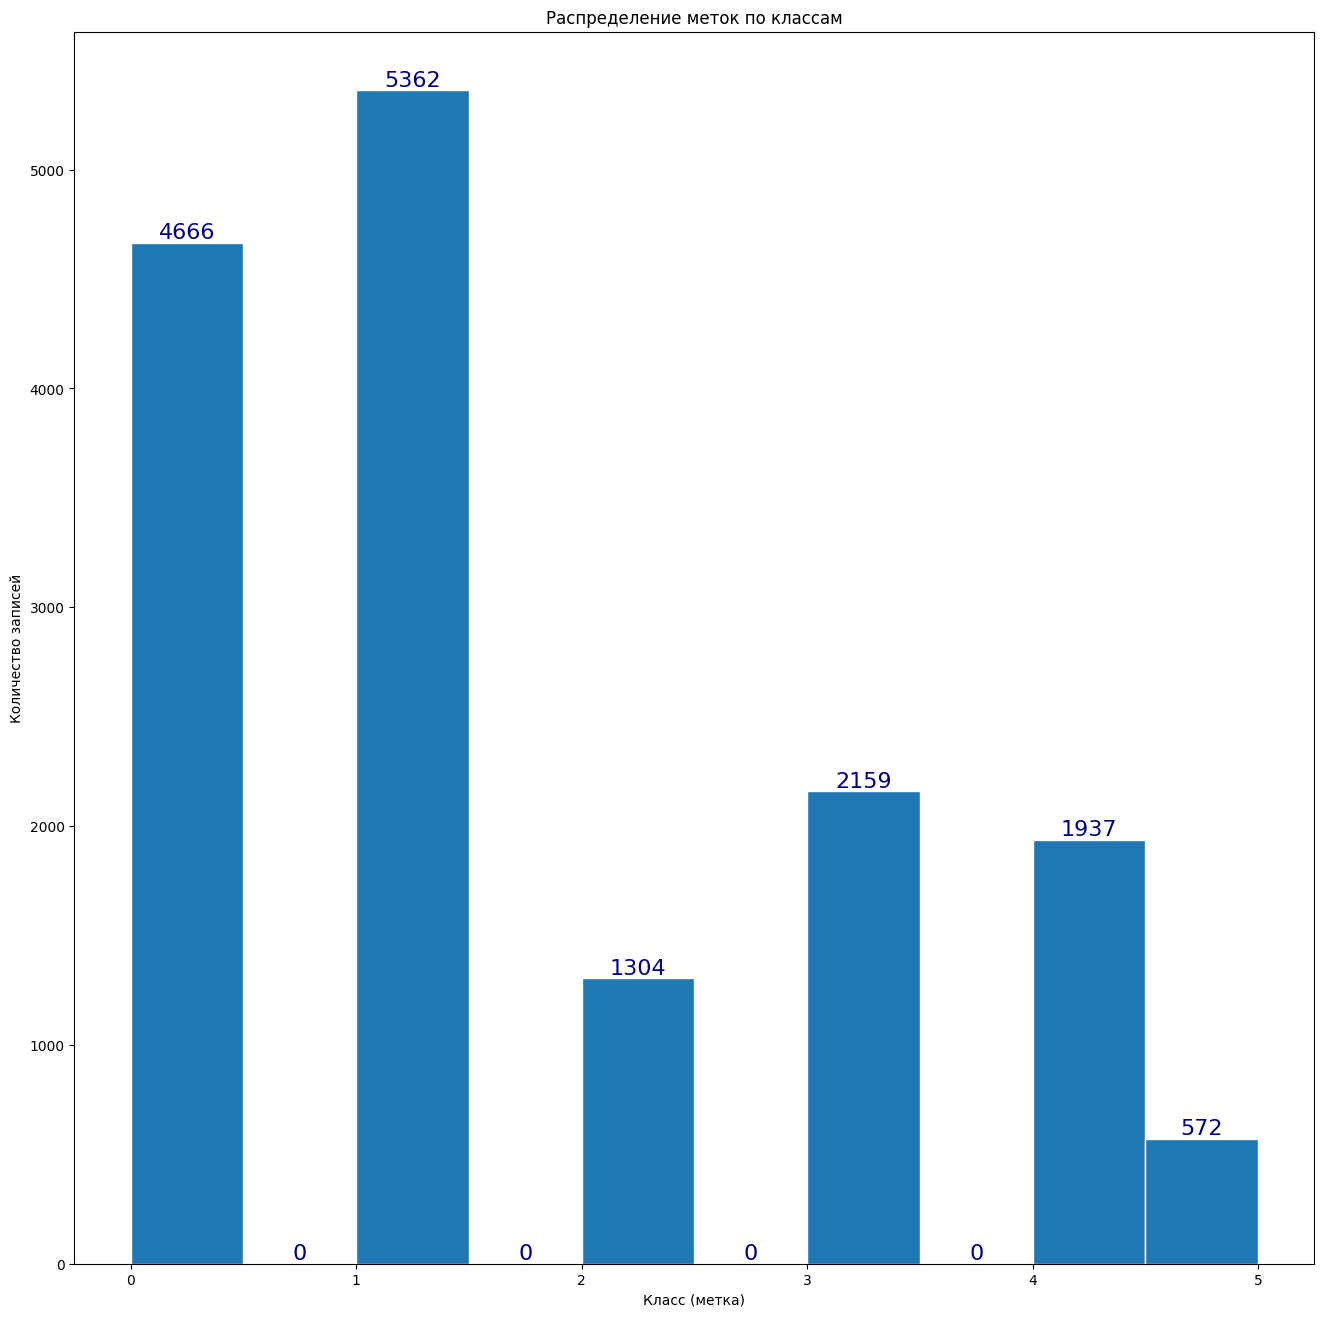

In [4]:
from matplotlib import pyplot as plot

plot.figure(figsize=(16, 16))

values, bins, bars = plot.hist(training_data['label'], edgecolor='white')

plot.xlabel("Класс (метка)")
plot.ylabel("Количество записей")

plot.title('Распределение меток по классам')

plot.bar_label(bars, fontsize=16, color='navy')

plot.show()

#### TF-IDF

In [5]:
import pandas

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=8192)

tfidf_matrix_test = vectorizer.fit_transform(test_data['text'])

tfidf_test = pandas.DataFrame(tfidf_matrix_test.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_matrix_training = vectorizer.fit_transform(training_data['text'])

tfidf_training = pandas.DataFrame(tfidf_matrix_training.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_matrix_validation = vectorizer.fit_transform(validation_data['text'])

tfidf_validation = pandas.DataFrame(tfidf_matrix_validation.toarray(), columns=vectorizer.get_feature_names_out())


#### Построение биграмм

In [6]:
from nltk import bigrams

for _, row in test_data.iterrows():
    found_bigrams = bigrams(row['text'].split())

for _, row in training_data.iterrows():
    found_bigrams = bigrams(row['text'].split())

for _, row in validation_data.iterrows():
    found_bigrams = bigrams(row['text'].split())

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


X_train = vectorizer.fit_transform(training_data['text'])
X_val = vectorizer.transform(validation_data['text'])
X_test = vectorizer.transform(test_data['text'])
# Подготовка целевых меток
y_train = training_data['label']
y_val = validation_data['label']

# Обучение случайного леса
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [8]:
# Предсказание и оценка модели
from sklearn.metrics import log_loss

val_predictions = rf_classifier.predict(X_val)
print("Метрики на валидационной выборке:")
print("Точность:", accuracy_score(y_val, val_predictions))

y_pred_proba = rf_classifier.predict_proba(X_val)
cross_entropy_loss = log_loss(y_val, y_pred_proba)
print("Cross-Entropy Loss:", cross_entropy_loss)

Метрики на валидационной выборке:
Точность: 0.8825
Cross-Entropy Loss: 0.4610983498958801


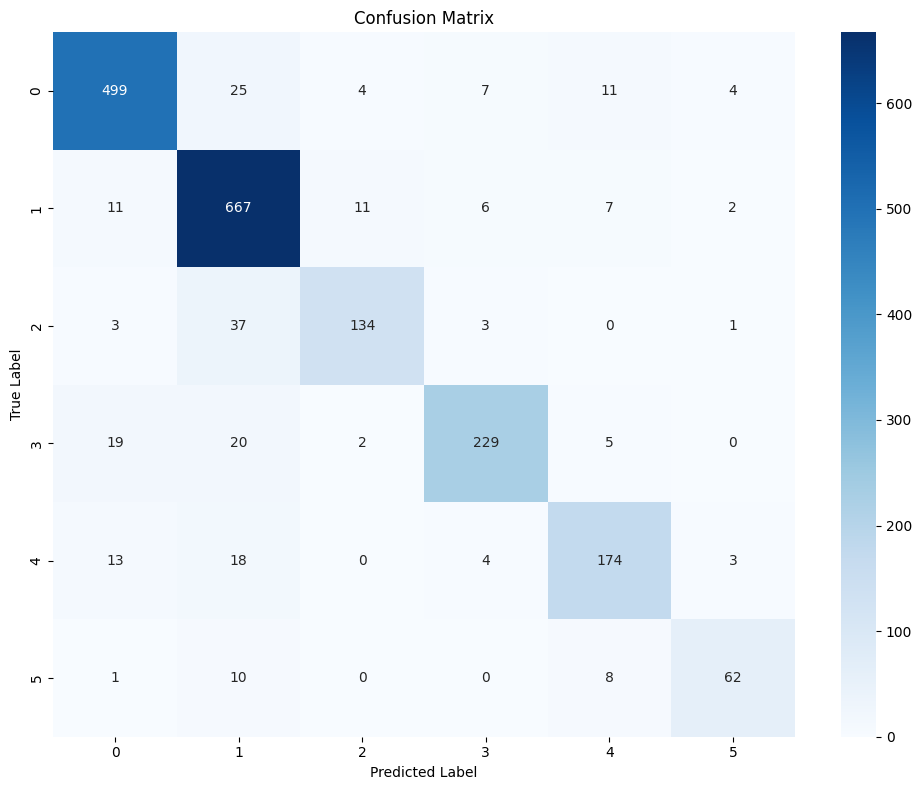


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       550
           1       0.86      0.95      0.90       704
           2       0.89      0.75      0.81       178
           3       0.92      0.83      0.87       275
           4       0.85      0.82      0.83       212
           5       0.86      0.77      0.81        81

    accuracy                           0.88      2000
   macro avg       0.88      0.84      0.86      2000
weighted avg       0.88      0.88      0.88      2000



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Получение предсказаний
y_pred = rf_classifier.predict(X_val)

# Построение confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y_val.unique()),
    yticklabels=sorted(y_val.unique())
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Детальный отчет о классификации
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

In [10]:
# Предсказание на тестовой выборке
test_predictions = rf_classifier.predict(X_test)
print(test_predictions)

[0 0 0 ... 1 1 4]


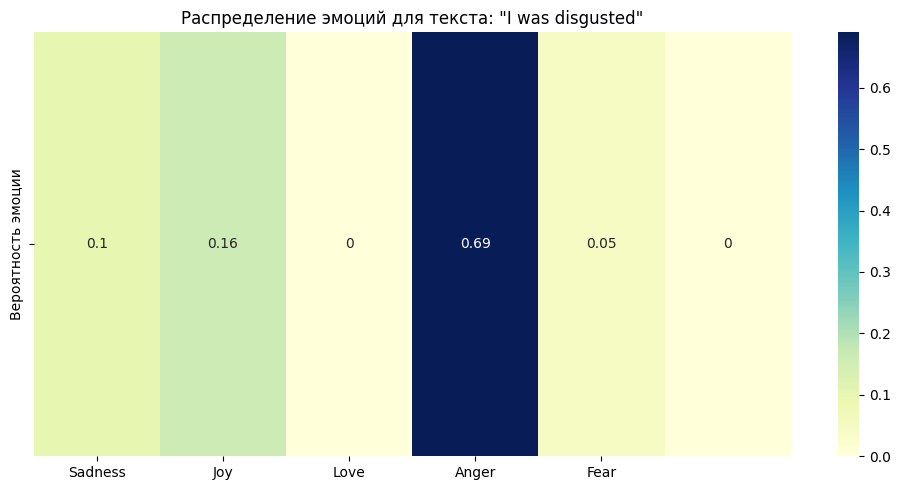

{'predicted_class': 'Anger', 'probabilities': {'Sadness': 0.1, 'Joy': 0.16, 'Love': 0.0, 'Anger': 0.69, 'Fear': 0.05}}


In [23]:
def classify_and_visualize_text(text):
    # Классификация текста
    text_vectorized = vectorizer.transform([text])
    prediction = rf_classifier.predict(text_vectorized)
    probabilities = rf_classifier.predict_proba(text_vectorized)[0]

    emotions = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear']
    plt.figure(figsize=(10, 5))
    sns.heatmap(
        probabilities.reshape(1, -1),
        annot=True,
        cmap='YlGnBu',
        xticklabels=emotions,
        yticklabels=['Вероятность эмоции'],
        cbar=True
    )
    plt.title(f'Распределение эмоций для текста: "{text}"')
    plt.tight_layout()
    plt.show()

    return {
        'predicted_class': emotions[prediction[0]],
        'probabilities': dict(zip(emotions, probabilities))
    }

# Пример использования
text_to_classify = "I was disgusted"
result = classify_and_visualize_text(text_to_classify)
print(result)